In [34]:
# Install if not already installed
#pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [35]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map species index to names
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

print(df.head(10))
df.shape


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7  setosa  
8  setosa  
9  setosa 

(150, 5)

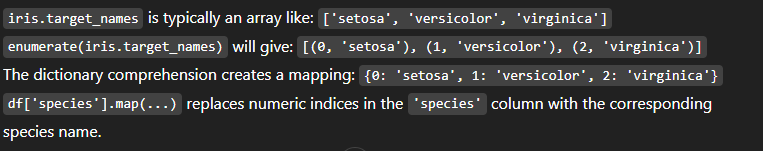

In [36]:
# Basic dataset info
print("Dataset Shape:", df.shape)
print("\nData Types and Non-null Counts:")
print(df.info())

Dataset Shape: (150, 5)

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [37]:
# First few rows
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [38]:
# Missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [39]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [40]:
#  Class distribution
print("Class Distribution:")
print(df['species'].value_counts())

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [41]:
# Correlation Matrix
correlation_matrix = df.iloc[:, :-1].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


C:\Users\HP\AppData\Local\Temp\ipykernel_9696\251268336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2')


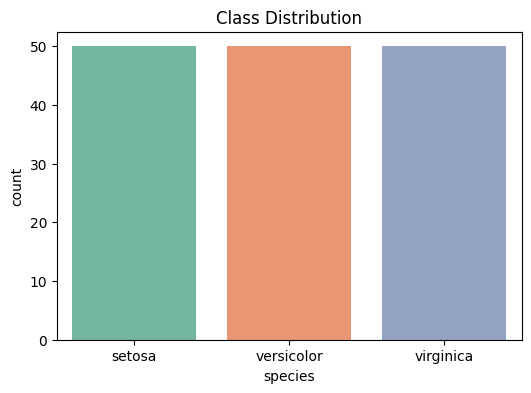

In [42]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='species', palette='Set2')
plt.title("Class Distribution")
plt.show()

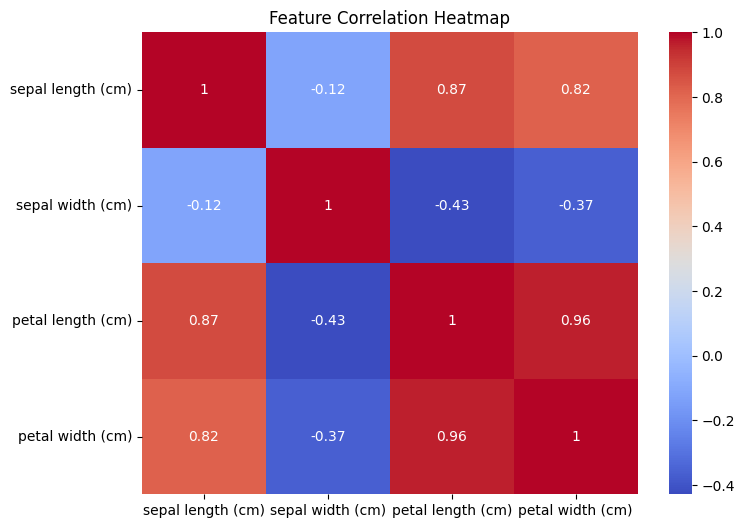

In [43]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

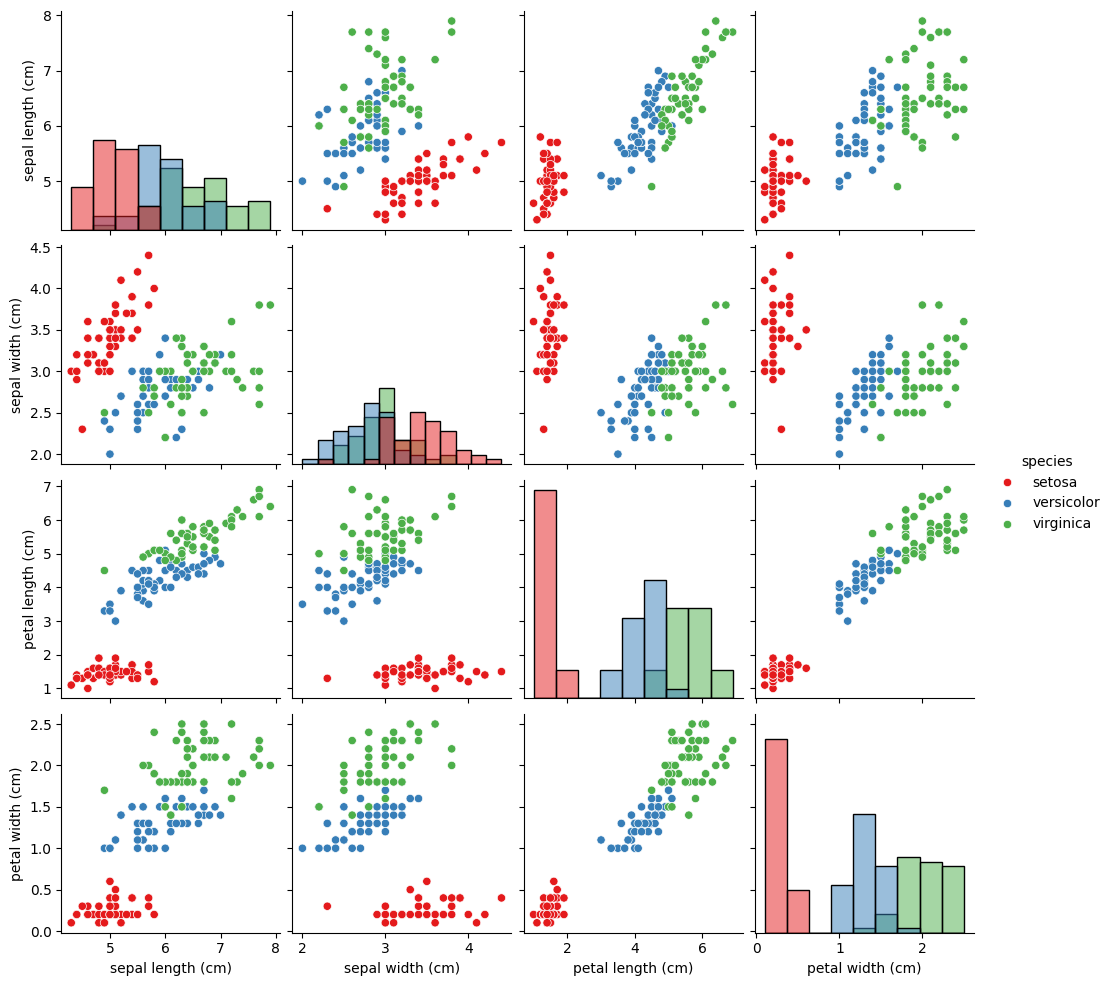

In [44]:
# Pairplot (fixed version with histograms on diagonal)
sns.pairplot(df, hue='species', diag_kind="hist", palette='Set1')
plt.show()

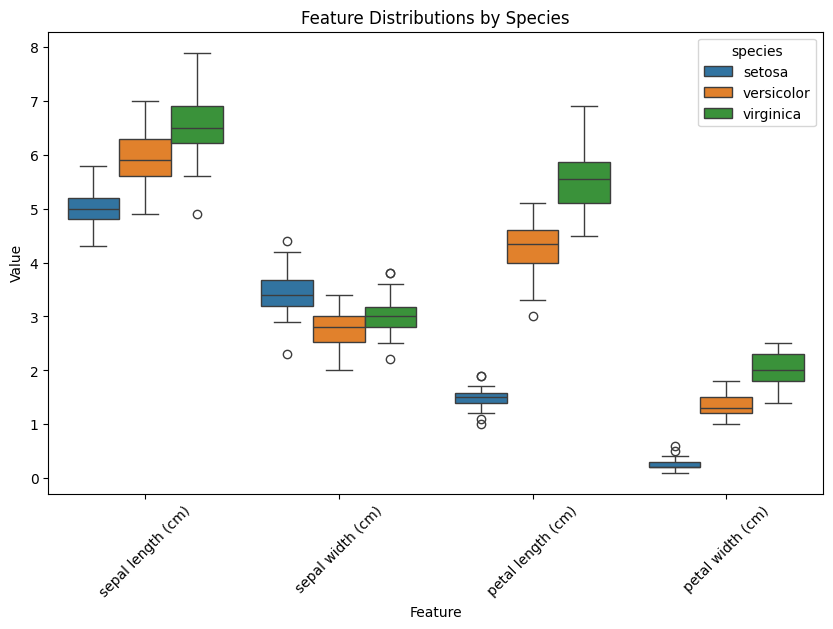

In [45]:
# Boxplots for each feature
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars='species', var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='species')
plt.xticks(rotation=45)
plt.title("Feature Distributions by Species")
plt.show()

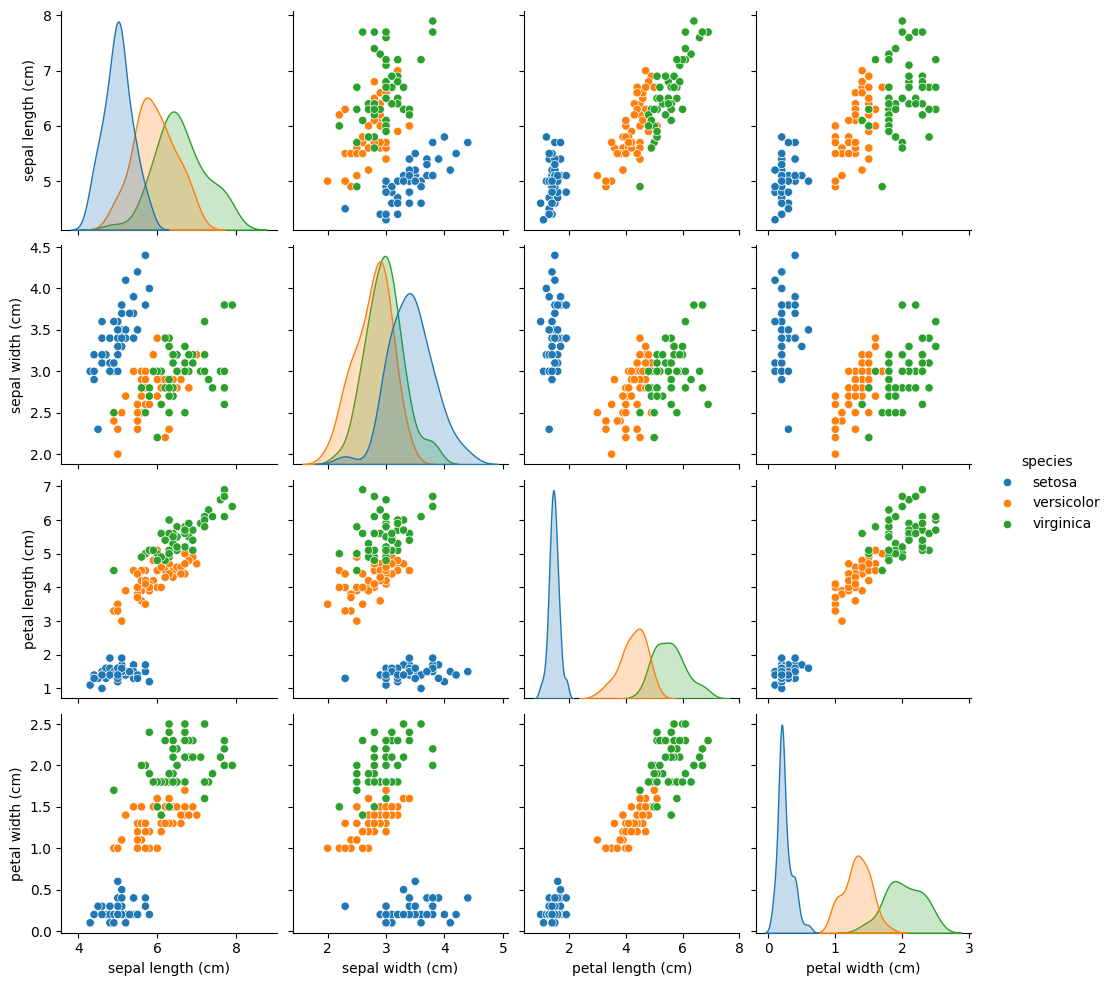

In [46]:
# Pairplot to visualize relationships
plt.figure.figsize=(18,11)
sns.pairplot(df, hue='species')
plt.show()

In [47]:
X = df[iris.feature_names]
y = df['species']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [48]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



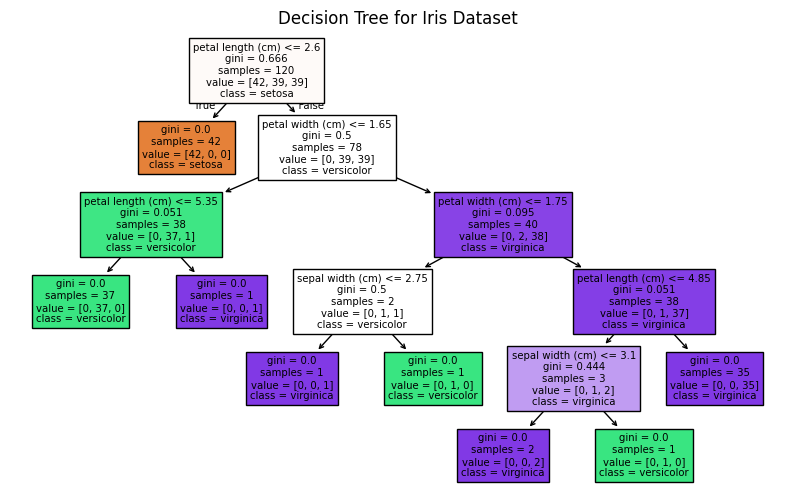

In [51]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()